# Exploratory Data Analysis of Lending Club's Loan Analysis

## The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
# Ignore warnings due to version problems

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading CSV file and checking it's attributes before proceeding further.
# Reading CSV file with dtype object.
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# check shape & datatype of loan data
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Data Cleaning

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Shortlisting the columns which serves the need of analysis 
L1 = loan[["id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","revol_util","addr_state","dti","open_acc","revol_bal","total_acc","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]]

In [8]:
L1.isnull().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
revol_util               50
addr_state                0
dti                       0
open_acc                  0
revol_bal                 0
total_acc                 0
out_prncp                 0
total_pymnt               0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
last_credit_pull_d        2
application_type          0
dtype: int64

In [9]:
# Check for duplicate rows in dataset based on id column

print(L1.duplicated(subset=None, keep='first').count())
dup=L1[L1.duplicated(['id'])]
dup


39717


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type


In [10]:
# sum it & to check how many rows have all missing values
print('Number of empty Rows:')
print(L1.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it & to check how many columns have all missing values
print('Number of empty Columns:')
print(L1.isnull().all(axis=0).sum())

Number of empty Rows:
0
Number of empty Columns:
0


In [11]:
# Let us see if there are any columns with unique or single values in them.

unique_column = L1.nunique()
print(unique_column)

id                     39717
loan_amnt                885
funded_amnt             1041
funded_amnt_inv         8205
term                       2
int_rate                 371
installment            15383
grade                      7
emp_length                11
home_ownership             5
annual_inc              5318
verification_status        3
issue_d                   55
loan_status                3
purpose                   14
revol_util              1089
addr_state                50
dti                     2868
open_acc                  40
revol_bal              21711
total_acc                 82
out_prncp               1137
total_pymnt            37850
total_rec_prncp         7976
total_rec_int          35148
last_pymnt_d             101
last_pymnt_amnt        34930
last_credit_pull_d       106
application_type           1
dtype: int64


In [12]:
round(L1.isnull().sum()/len(L1.index), 2)*100

id                     0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
emp_length             3.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
revol_util             0.0
addr_state             0.0
dti                    0.0
open_acc               0.0
revol_bal              0.0
total_acc              0.0
out_prncp              0.0
total_pymnt            0.0
total_rec_prncp        0.0
total_rec_int          0.0
last_pymnt_d           0.0
last_pymnt_amnt        0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [13]:
#employement length columns seems to have the highest number of missing values
#But since the values aren't that large in number , we will drop the missing values
L1.emp_length.fillna(value = L1.emp_length.mode()[0],inplace = True)

In [14]:
#dropping the missing values in rest of the columns 
L1.dropna(subset = ["last_pymnt_d","last_credit_pull_d","revol_util"], axis = 0,inplace = True)

In [15]:
#Checking if any column still has any missing values
#As we can see , there are no null values left to be dealt with!
L1.isnull().sum()

id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
revol_util             0
addr_state             0
dti                    0
open_acc               0
revol_bal              0
total_acc              0
out_prncp              0
total_pymnt            0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
application_type       0
dtype: int64

# Data preparation
## let us start with loan status columns to begin with

In [16]:
L1['loan_status'].value_counts()


Fully Paid     32915
Charged Off     5543
Current         1140
Name: loan_status, dtype: int64

In [17]:
# Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

L1 = L1[~(L1['loan_status'] == 'Current')]
L1.shape

(38458, 29)

In [116]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
L1['loan_amnt_cats'] = pd.cut(L1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
L1['annual_inc_cats'] = pd.cut(L1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
L1['int_rate_cats'] = pd.cut(L1['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
L1['dti_cats'] = pd.cut(L1['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


# Standardizing the data
- "revol_util" column although described as an object column, it has continous values.
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [18]:
# Lets remove % symbol from revol_util column so that it can be used in calculations
L1['revol_util'] = L1['revol_util'].str.rstrip('%')
L1['int_rate'] = L1['int_rate'].str.rstrip('%')
L1['emp_length'] = L1['emp_length'].str.rstrip('%')

In [19]:
L1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,9,0.0,5863.155187,5000.00,863.16,Jan-15,171.62,May-16,INDIVIDUAL
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,...,1687,4,0.0,1008.710000,456.46,435.17,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,10,0.0,3005.666844,2400.00,605.67,Jun-14,649.91,May-16,INDIVIDUAL
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,37,0.0,12231.890000,10000.00,2214.92,Jan-15,357.48,Apr-16,INDIVIDUAL
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,12,0.0,5632.210000,5000.00,632.21,Jan-15,161.03,Jan-16,INDIVIDUAL


In [20]:
L1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38458 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38458 non-null  int64  
 1   loan_amnt            38458 non-null  int64  
 2   funded_amnt          38458 non-null  int64  
 3   funded_amnt_inv      38458 non-null  float64
 4   term                 38458 non-null  object 
 5   int_rate             38458 non-null  object 
 6   installment          38458 non-null  float64
 7   grade                38458 non-null  object 
 8   emp_length           38458 non-null  object 
 9   home_ownership       38458 non-null  object 
 10  annual_inc           38458 non-null  float64
 11  verification_status  38458 non-null  object 
 12  issue_d              38458 non-null  object 
 13  loan_status          38458 non-null  object 
 14  purpose              38458 non-null  object 
 15  revol_util           38458 non-null 

In [21]:
L1.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
revol_util              object
addr_state              object
dti                    float64
open_acc                 int64
revol_bal                int64
total_acc                int64
out_prncp              float64
total_pymnt            float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
last_credit_pull_d      object
application_type        object
dtype: object

In [22]:
print("Mode : " + L1.emp_length.mode()[0])
L1.emp_length.value_counts()

Mode : 10+ years


10+ years    9503
< 1 year     4488
2 years      4280
3 years      4001
4 years      3328
5 years      3180
1 year       3154
6 years      2164
7 years      1707
8 years      1430
9 years      1223
Name: emp_length, dtype: int64

In [23]:
L1['term'].value_counts()

 36 months    28997
 60 months     9461
Name: term, dtype: int64

In [24]:
# Lets convert 'term' into int
L1['term'] = L1['term'].str.replace('months', '').astype(int)

In [25]:
# Now lets check the datatypes
L1.dtypes


id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int32
int_rate                object
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
revol_util              object
addr_state              object
dti                    float64
open_acc                 int64
revol_bal                int64
total_acc                int64
out_prncp              float64
total_pymnt            float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
last_credit_pull_d      object
application_type        object
dtype: object

In [26]:
L1['issue_d'].value_counts()

Nov-11    2056
Dec-11    2041
Oct-11    1936
Sep-11    1907
Aug-11    1797
Jul-11    1736
Jun-11    1724
May-11    1605
Apr-11    1556
Mar-11    1435
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1125
Nov-10    1120
Jul-10    1117
Sep-10    1084
Aug-10    1073
Jun-10    1022
May-10     918
Apr-10     826
Mar-10     735
Feb-10     622
Nov-09     597
Dec-09     595
Jan-10     585
Oct-09     543
Sep-09     447
Aug-09     408
Jul-09     372
Jun-09     353
May-09     319
Apr-09     287
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      84
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [27]:
# Extracting year and month from the 'issue_d'
L1[['Month', 'Year']] = L1['issue_d'].str.split('-', expand = True)

In [28]:
L1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,Month,Year
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,...,0.0,5863.155187,5000.00,863.16,Jan-15,171.62,May-16,INDIVIDUAL,Dec,11
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,...,0.0,1008.710000,456.46,435.17,Apr-13,119.66,Sep-13,INDIVIDUAL,Dec,11
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,...,0.0,3005.666844,2400.00,605.67,Jun-14,649.91,May-16,INDIVIDUAL,Dec,11
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,...,0.0,12231.890000,10000.00,2214.92,Jan-15,357.48,Apr-16,INDIVIDUAL,Dec,11
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,...,0.0,5632.210000,5000.00,632.21,Jan-15,161.03,Jan-16,INDIVIDUAL,Dec,11


In [29]:
a1 = L1.drop('issue_d', axis = 1, inplace = True)

In [30]:
a1

In [31]:
L1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'revol_util',
       'addr_state', 'dti', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'Month',
       'Year'],
      dtype='object')

In [32]:
L1['loan_inc_ratio'] = L1.loan_amnt/L1.annual_inc
L1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,Month,Year,loan_inc_ratio
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,...,5863.155187,5000.00,863.16,Jan-15,171.62,May-16,INDIVIDUAL,Dec,11,0.208333
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,...,1008.710000,456.46,435.17,Apr-13,119.66,Sep-13,INDIVIDUAL,Dec,11,0.083333
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,...,3005.666844,2400.00,605.67,Jun-14,649.91,May-16,INDIVIDUAL,Dec,11,0.195886
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,...,12231.890000,10000.00,2214.92,Jan-15,357.48,Apr-16,INDIVIDUAL,Dec,11,0.203252
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,...,5632.210000,5000.00,632.21,Jan-15,161.03,Jan-16,INDIVIDUAL,Dec,11,0.138889


In [41]:
np.quantile(L1.loan_inc_ratio, [0.25, 0.50, 0.75])

array([0.09803922, 0.16307071, 0.25      ])

In [34]:
L1['int_rate'] = L1['int_rate'].str.replace('%', '').astype(float)

# Now you can calculate the quantiles
quantiles = np.quantile(L1['int_rate'], [0.25, 0.50, 0.75])
quantiles

array([ 8.94, 11.71, 14.35])

In [40]:
#converting the data type of length of employement column in a suitable format
L1.emp_length = L1.emp_length.apply(lambda x:int( 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [42]:
np.quantile(L1.emp_length, [0.25, 0.50, 0.75])

array([2., 4., 9.])

In [44]:
#Standardising the values of some numerical columns 
def Standardizing(x):
    return(x.apply(lambda x : int(round(x))))
           
L1.installment = Standardizing(L1.installment)
L1.annual_inc = Standardizing(L1.annual_inc)
L1.out_prncp = Standardizing(L1.out_prncp)
L1.total_pymnt = Standardizing(L1.total_pymnt)
L1.total_rec_prncp = Standardizing(L1.total_rec_prncp)
L1.total_rec_int = Standardizing(L1.total_rec_int)
L1.last_pymnt_amnt = Standardizing(L1.last_pymnt_amnt)
L1.revol_util = L1.revol_util.apply(lambda x :float(x.replace("%","")))

In [45]:
#Dropping the duplicated values if there are any:
L1.duplicated(subset = None,keep = "first")
L1.drop_duplicates(keep = "first",ignore_index = True,inplace = True)

In [46]:
np.quantile(L1.annual_inc, [0.25, 0.50, 0.75])

array([40000., 59000., 82000.])

In [47]:
np.quantile(L1.dti, [0.25, 0.50, 0.75])

array([ 8.14, 13.37, 18.56])

In [48]:
np.quantile(L1.loan_amnt, [0.25, 0.50, 0.75])

array([ 5375.,  9700., 15000.])

# Data visualisation and analyis

## Handling outliers

In [49]:
L1['loan_amnt'].describe()


count    38458.000000
mean     11060.022622
std       7346.814917
min        500.000000
25%       5375.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

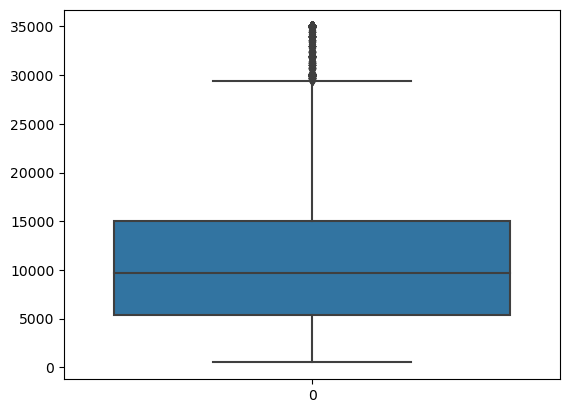

In [50]:
sns.boxplot(L1.loan_amnt)
plt.show()


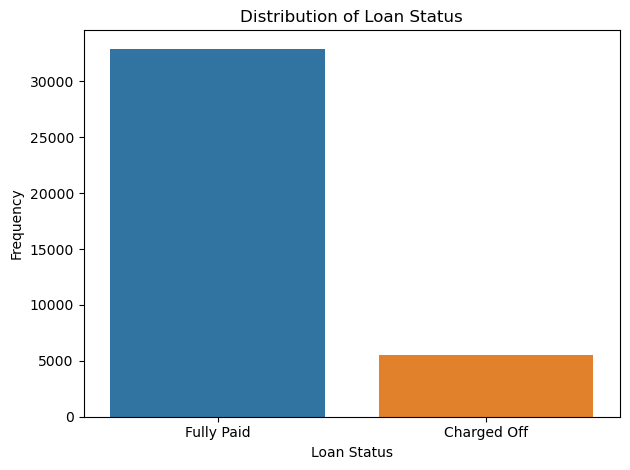

In [53]:
sns.countplot(data=L1, x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status')
plt.tight_layout()
plt.show()

In [54]:
L1.int_rate.describe()

count    38458.000000
mean        11.924248
std          3.690205
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

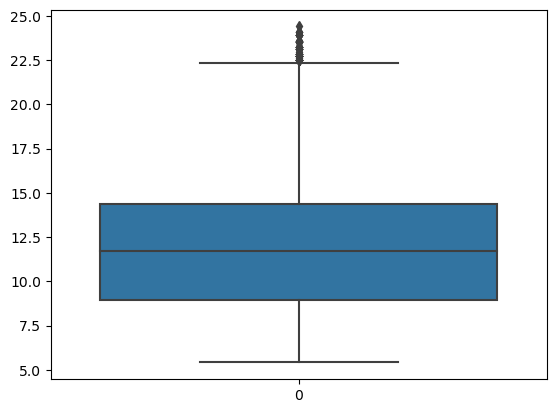

In [55]:
sns.boxplot(L1.int_rate)
plt.show()

In [58]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(L1['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

L1 = L1[L1["annual_inc"] < L1["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(L1["annual_inc"].describe())


Before Removal of Outliers :

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     38073.000000
mean      65380.939800
std       35150.175501
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64


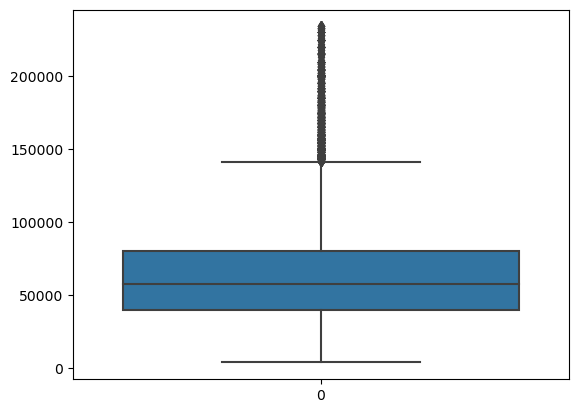

In [59]:
sns.boxplot(L1.annual_inc)
plt.show()

## Assuming the per capita income in USA (70,000 Dollars) is even across nearly all states, then as we can see, a lot of people are in the 0-40k or 40k-80k range can be considered as lower-middle class thus making them more vulnerable to bad credit score.

In [81]:
L1["annual_inc_binned"] = pd.cut(L1.annual_inc,np.arange(0,240000,40000))
L1.annual_inc_binned.value_counts()

(40000, 80000]      18840
(0, 40000]           9635
(80000, 120000]      6833
(120000, 160000]     1926
(160000, 200000]      655
Name: annual_inc_binned, dtype: int64

In [67]:
print(L1['purpose'].value_counts())



debt_consolidation    17877
credit_card            4982
other                  3809
home_improvement       2789
major_purchase         2119
small_business         1713
car                    1489
wedding                 910
medical                 672
moving                  568
vacation                374
house                   355
educational             317
renewable_energy         99
Name: purpose, dtype: int64


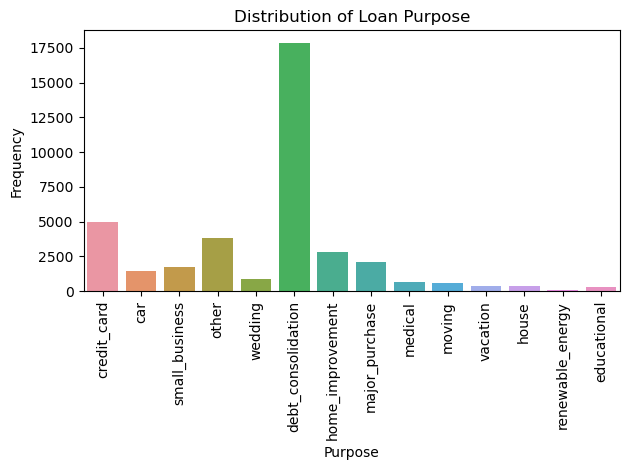

In [69]:
sns.countplot(data=L1, x='purpose')
plt.xticks(rotation=90)
plt.title('Distribution of Loan Purpose')  # Adjust the title as needed
plt.xlabel('Purpose')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

In [70]:
L1.dti.describe()

count    38073.000000
mean        13.339340
std          6.655185
min          0.000000
25%          8.220000
50%         13.440000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

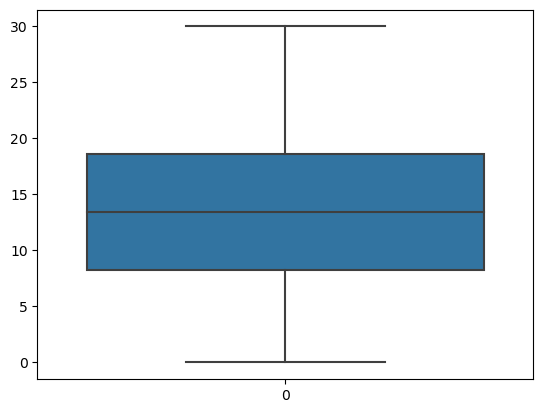

In [84]:
sns.boxplot(L1.dti)
plt.show()

# Univariate Analysis

## From the below graph , we can derive the fact that highest number of loan given is of the category B followed by A and C. Although , A Category loans are good , B/C category of loans are given to low credit quality borrowers and are charged higher rates of interests which could be the indicator of bad debts .

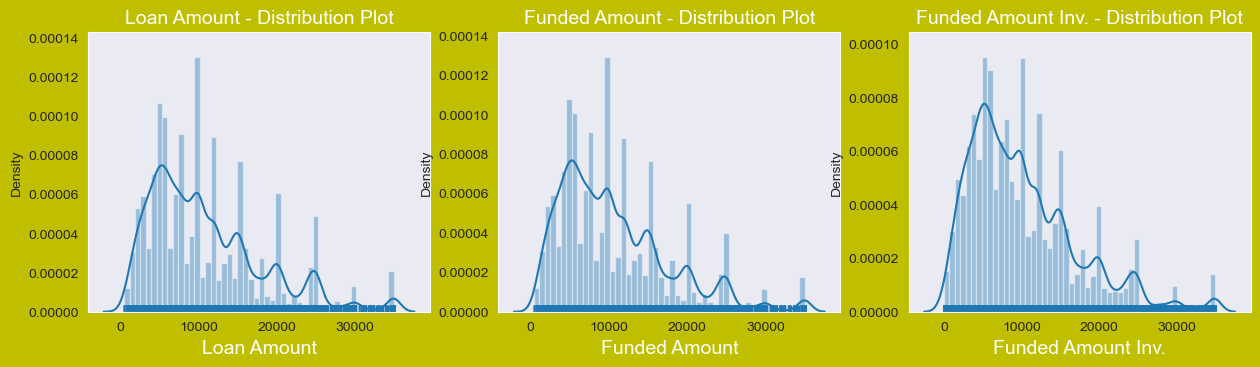

In [147]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(L1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(L1['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(L1['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

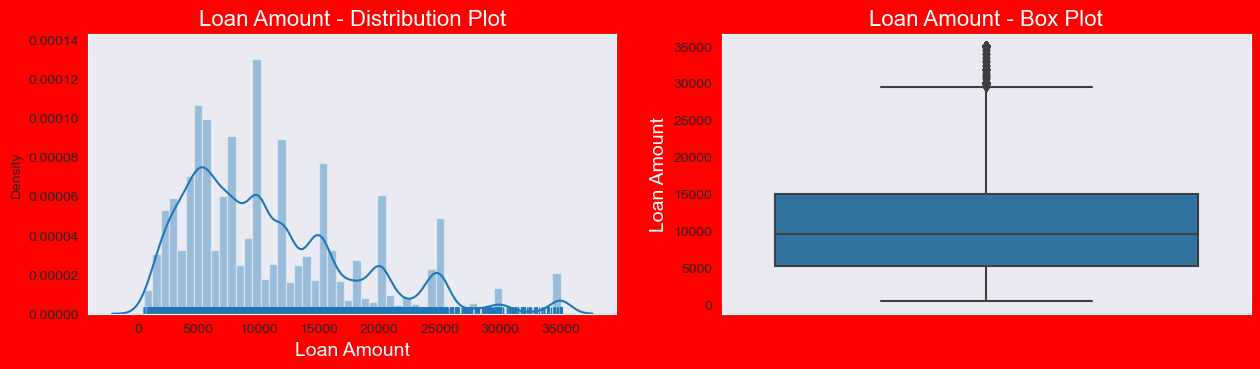

In [148]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='r')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(L1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=L1['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

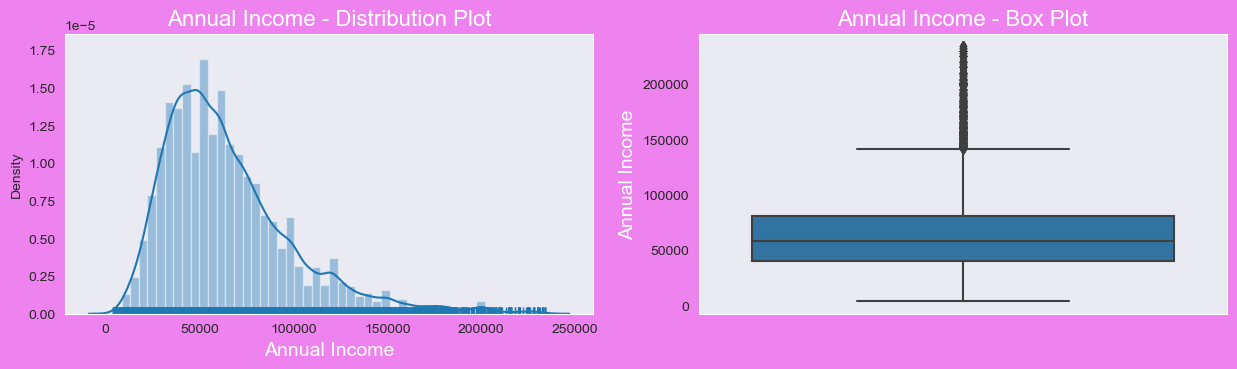

In [152]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='violet')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(L1['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=L1['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

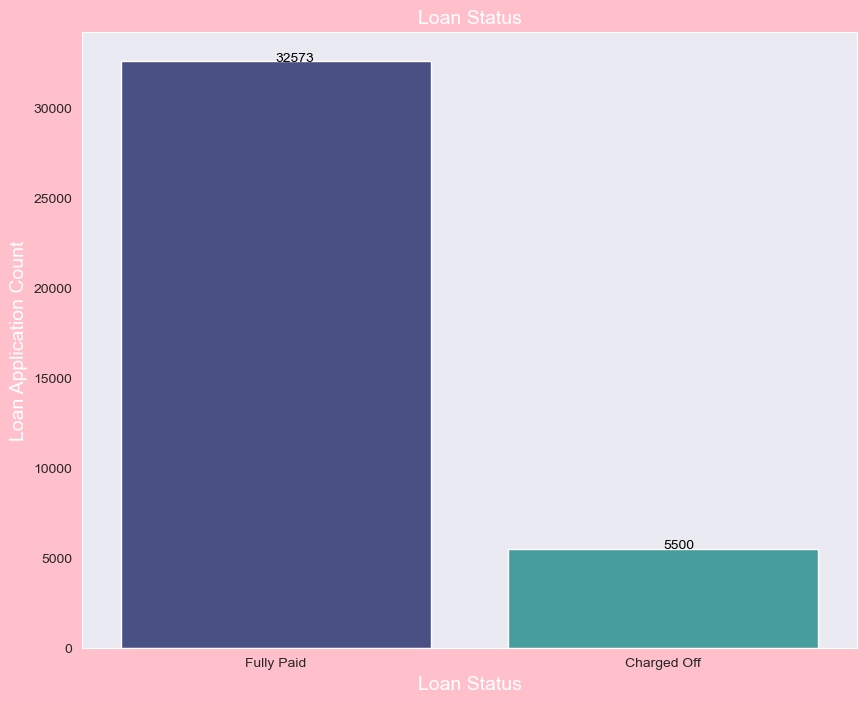

In [154]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='pink')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=L1,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=L1['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

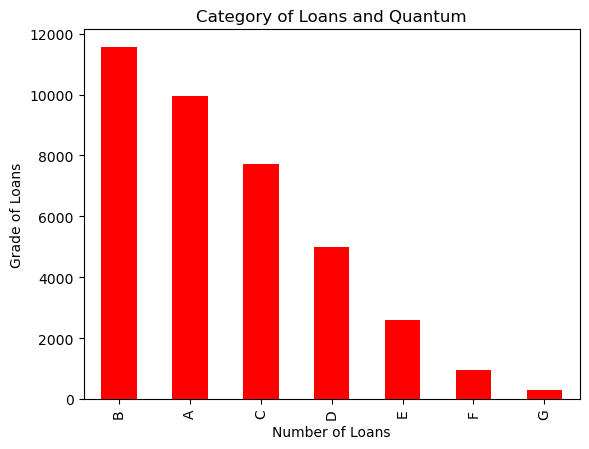

In [83]:
#Plotting the bar graph of grade of loans 
L1.grade.value_counts().plot.bar(color='red')
plt.xlabel("Number of Loans")
plt.ylabel("Grade of Loans")
plt.xticks(rotation = 90)
plt.title("Category of Loans and Quantum")
plt.show()

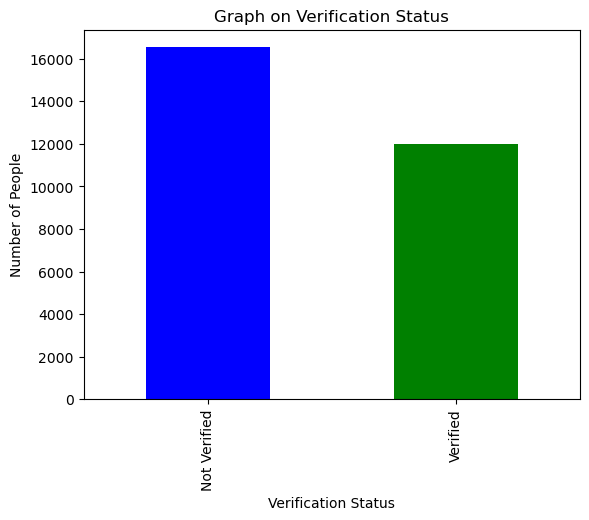

In [74]:
# Plotting the bar graph of verification status variable
sv = L1[~(L1.verification_status == "Source Verified")]
sv.verification_status.value_counts().plot.bar(color = ["blue","green"])
plt.title("Graph on Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Number of People")
plt.show()

## Another contributing factor of bad debts could be having large number of credit lines . Having large number of credit lines  (more than 3 as per wikipedia) makes it difficult to keep record of monthly payments leading to bad debts . Large number of people have taken 8-12 credit lines.

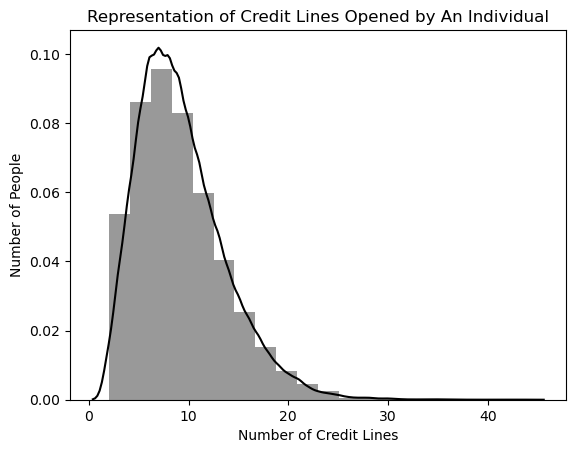

In [79]:
# making distribution plot of credit lines oepend by people.Distribution plot is histogram with kde curve.
sns.distplot(L1.open_acc, bins = 20,color = "black")
plt.title("Representation of Credit Lines Opened by An Individual")
plt.xlabel("Number of Credit Lines")
plt.ylabel("Number of People")
plt.show()


## From the below graph , people who have to pay rent are large in number making it difficult for them to meet the monthly credit repayments requirements . People who have thier house mortgaged could be considered as delinquents assuming they are middle-class or poor

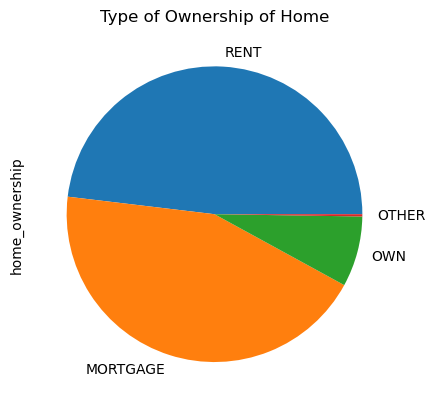

In [80]:
#preparing a bar graph on home_ownership variable.
sv1 = L1[~(L1.home_ownership =="NONE")]
sv1.home_ownership.value_counts().plot.pie()
plt.title("Type of Ownership of Home")
plt.show()

# Bivariate Analysis

####  As we can see, as the grades of loan decreases , the interest rates increases indicating that higher the risk , higher will be the 

####     rewards . But this concept can back-fire because of the fact that , worse grades of loans can threaten the profit motive if 

####     borrowers doesn't repay.

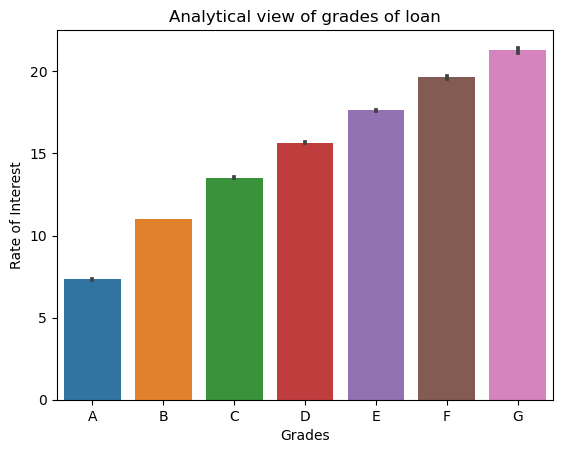

In [85]:
# making a bar graphs of grades of loans in respect to interest rates
plt.style.use("default")
sns.barplot(data = L1 , x = "grade",y = "int_rate", order = ["A","B","C","D","E","F","G"])
plt.title("Analytical view of grades of loan")
plt.xlabel("Grades")
plt.ylabel("Rate of Interest")
plt.show()

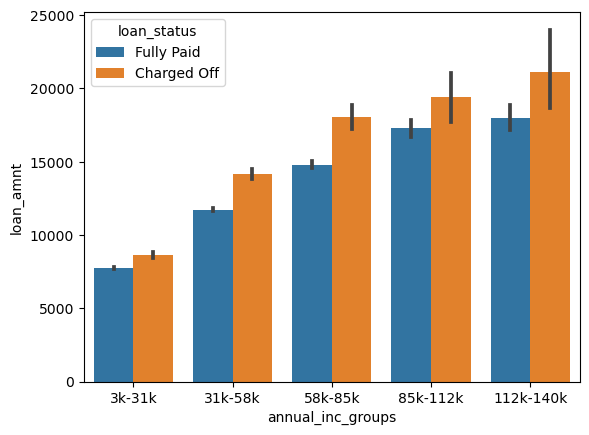

In [87]:
#making bar graph of loan amount and annual income 
L1['annual_inc_groups'] = pd.cut(L1['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = L1)
plt.show()

####  One may not able to draw inferences from scatterplot , but the histogram on the outerpanes axis makes it evident that large 

####      amount of loans are taken for debt consolidation which indicates the people's inability to pay previous loans . So instead of 

####      blocking the funds into giving loan as debt consolidation , Lending Club should give loan for other purposes.

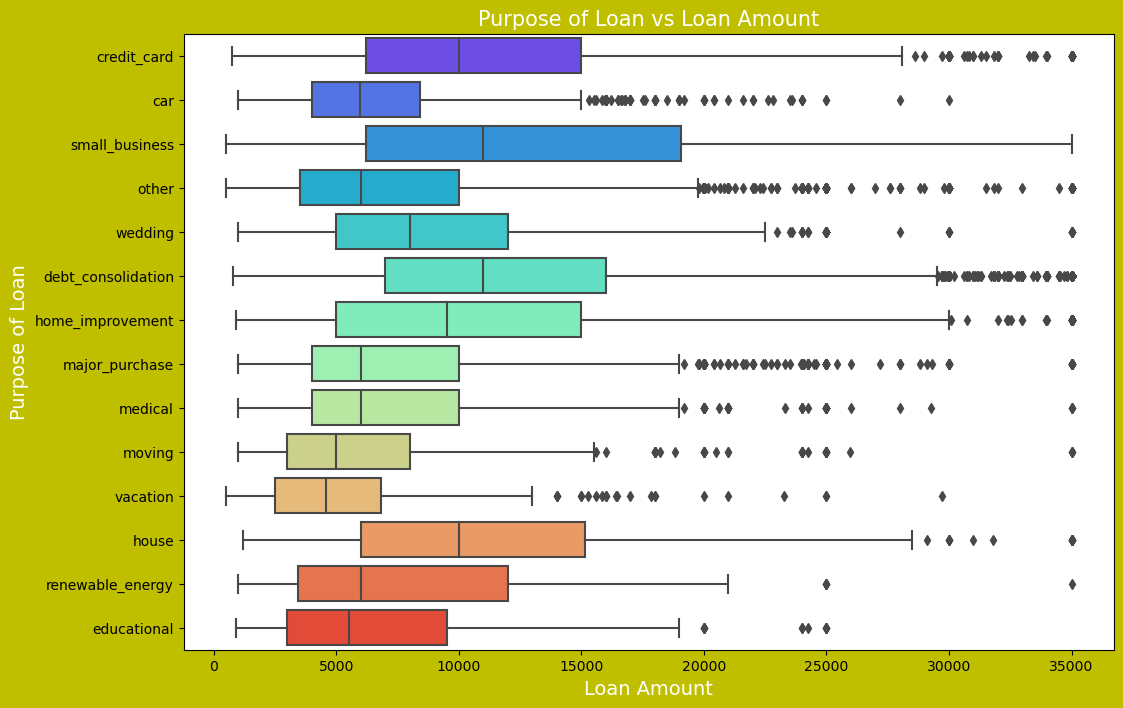

In [89]:
plt.figure(figsize=(12,8),facecolor='y')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =L1,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()
# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

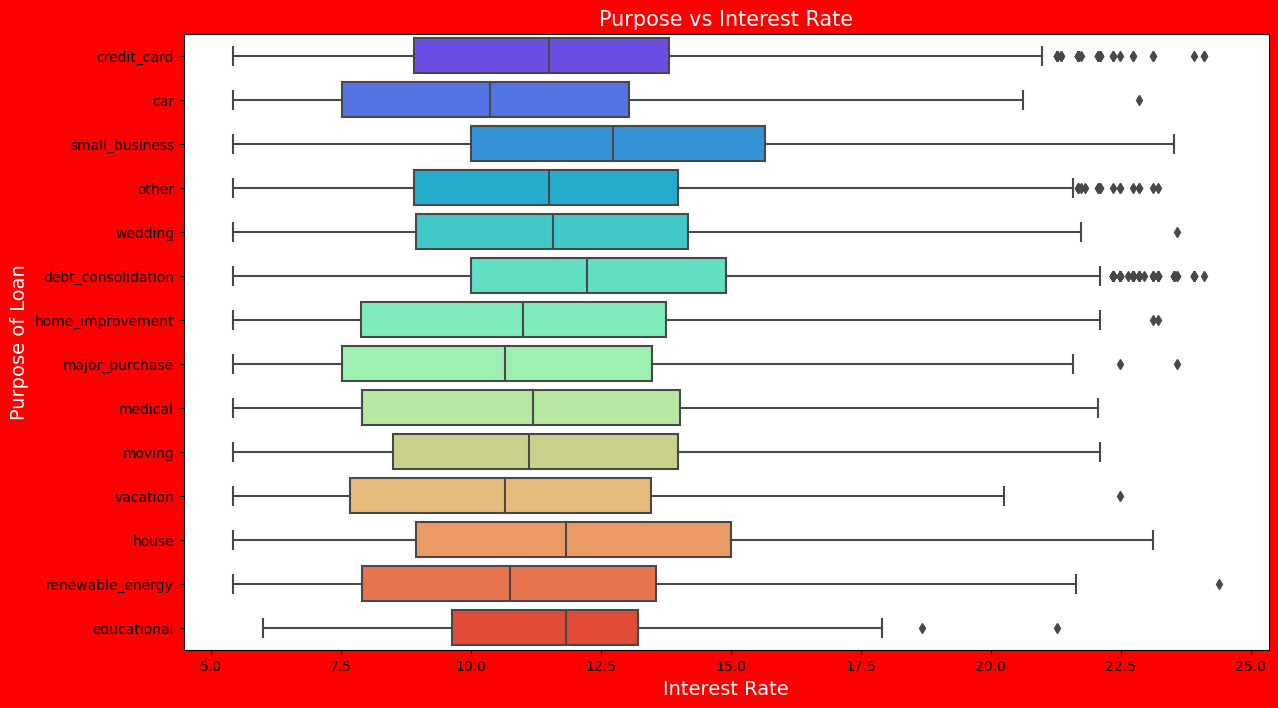

In [91]:
plt.figure(figsize=(14,8),facecolor='r')
ax = sns.boxplot(x='int_rate', y='purpose', data =L1,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

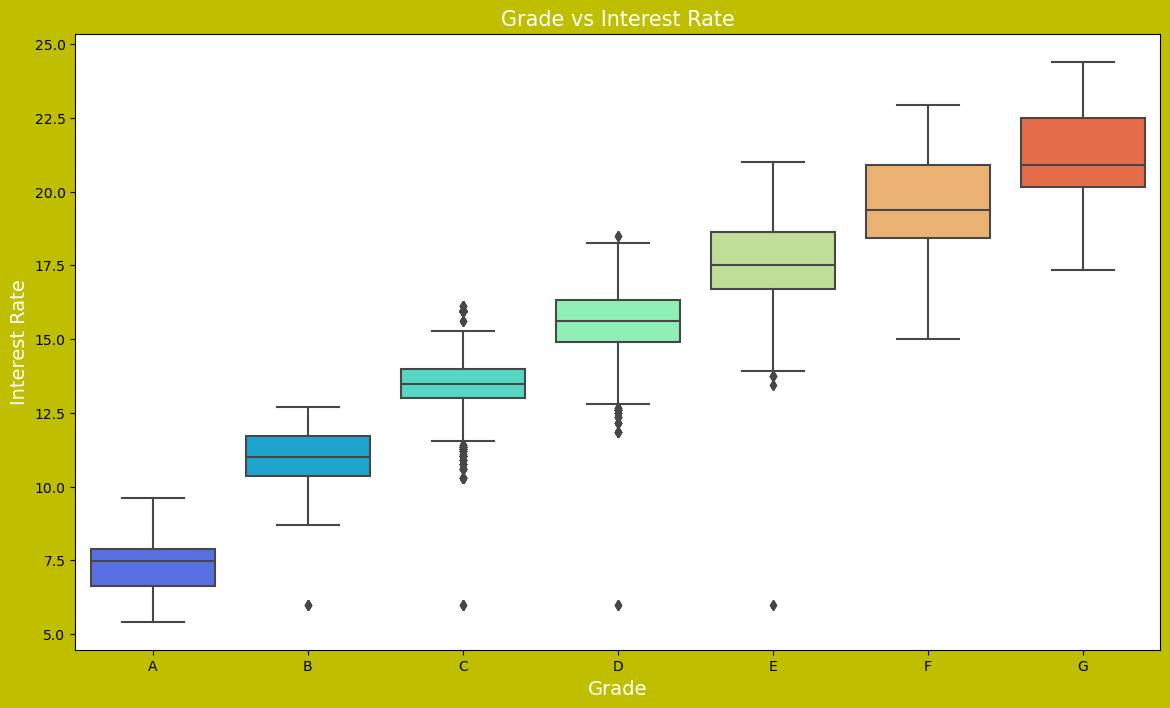

In [96]:
plt.figure(figsize=(14,8),facecolor='y')
ax = sns.boxplot(y='int_rate', x='grade', data =L1,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

In [102]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = L1.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2007,9995,12002,0.167222
1,Source Verified,1406,8126,9532,0.147503
0,Not Verified,2087,14452,16539,0.126187


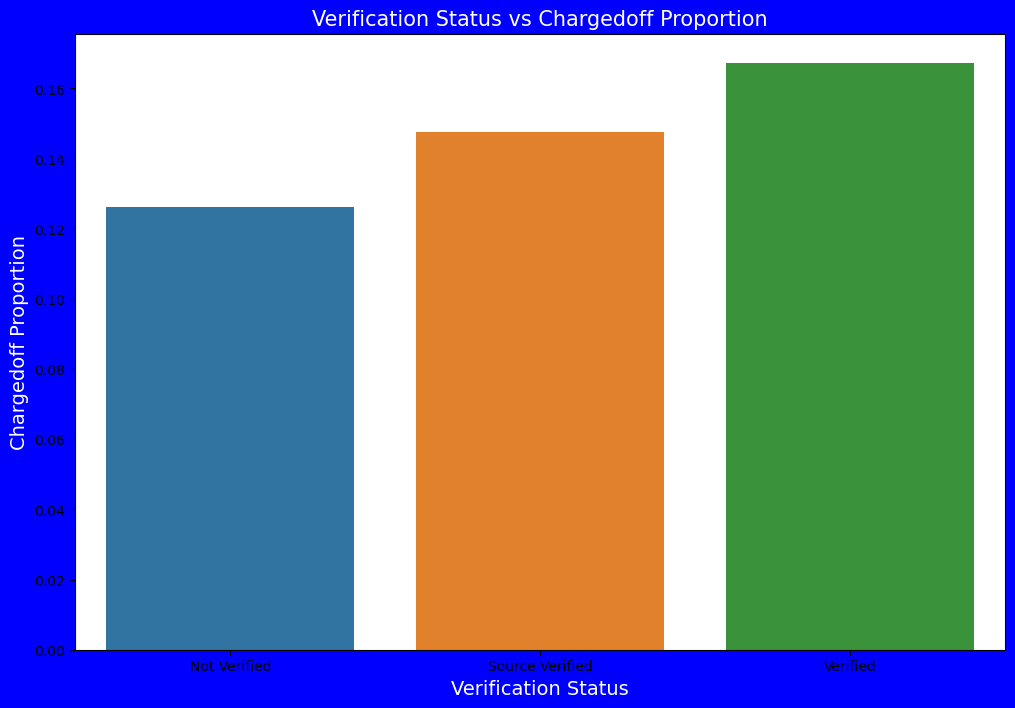

In [103]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [104]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = L1.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,10,1527,7837,9364,0.163071
7,7,261,1432,1693,0.154164
1,1,443,2685,3128,0.141624
5,5,445,2709,3154,0.141091
8,8,199,1215,1414,0.140736
6,6,302,1845,2147,0.140661
0,0,624,3835,4459,0.139942
3,3,544,3422,3966,0.137166
4,4,447,2855,3302,0.135373
2,2,554,3680,4234,0.130846


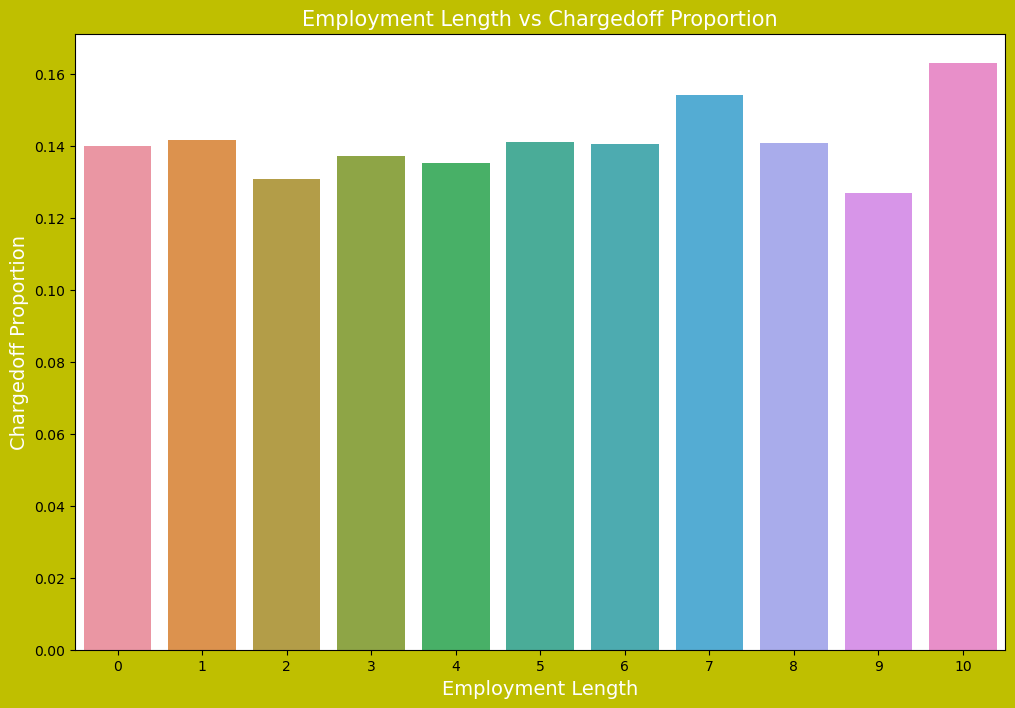

In [106]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

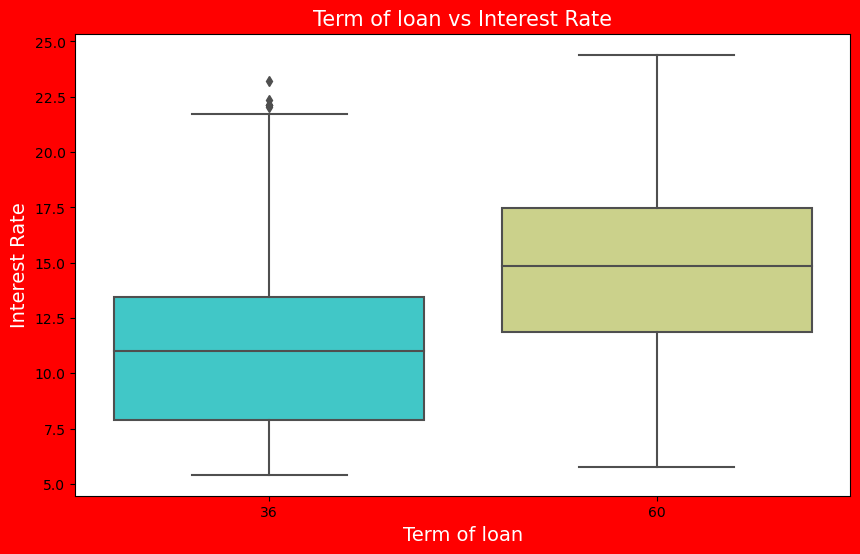

In [109]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='r')
ax = sns.boxplot(y='int_rate', x='term', data =L1,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

In [118]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = L1.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,219,933,1152,0.190104
1,20000-40000,1492,6991,8483,0.175881
2,40000-60000,1708,9528,11236,0.152011
3,60000-80000,1008,6596,7604,0.132562
4,80000 +,1073,8525,9598,0.111794


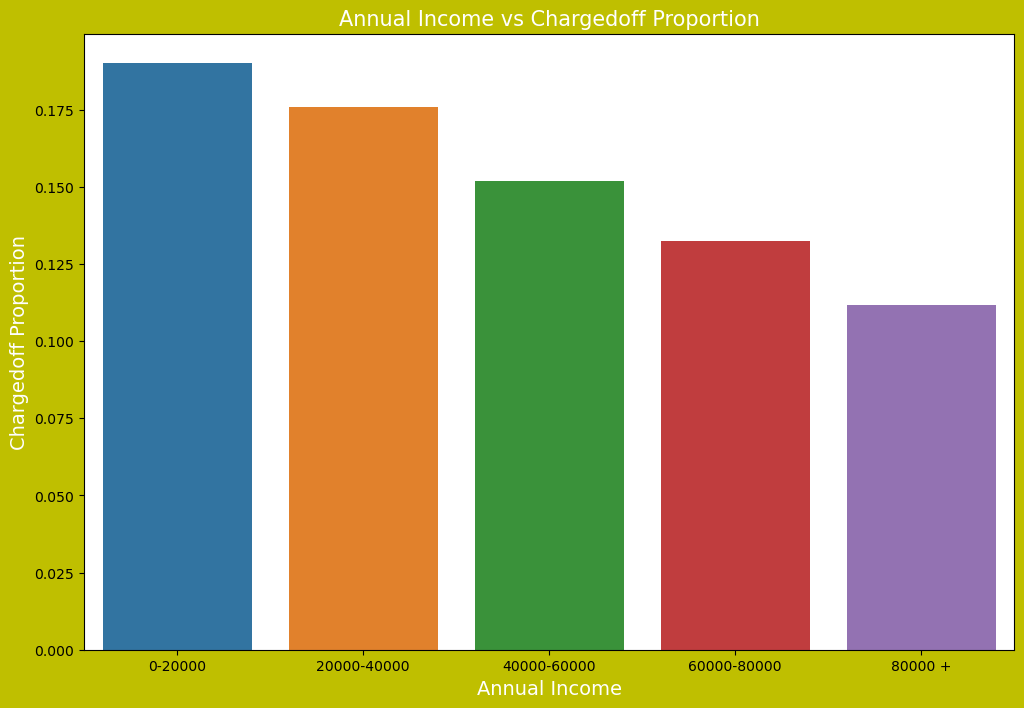

In [120]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

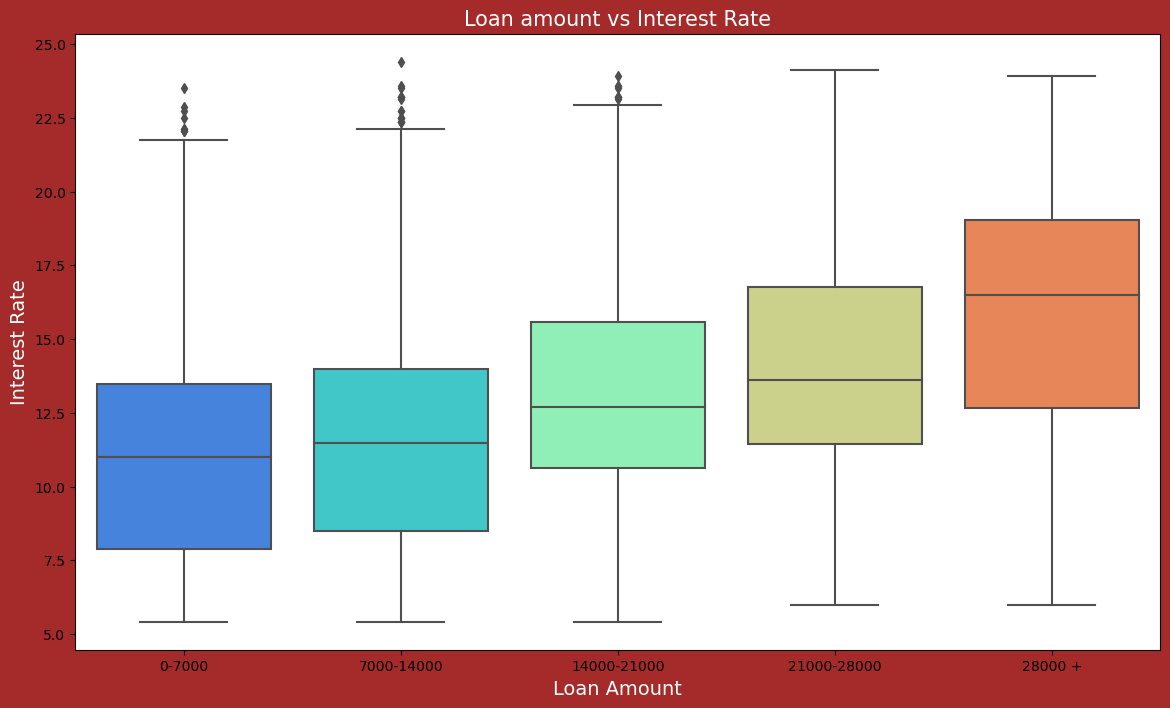

In [125]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='brown')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =L1,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

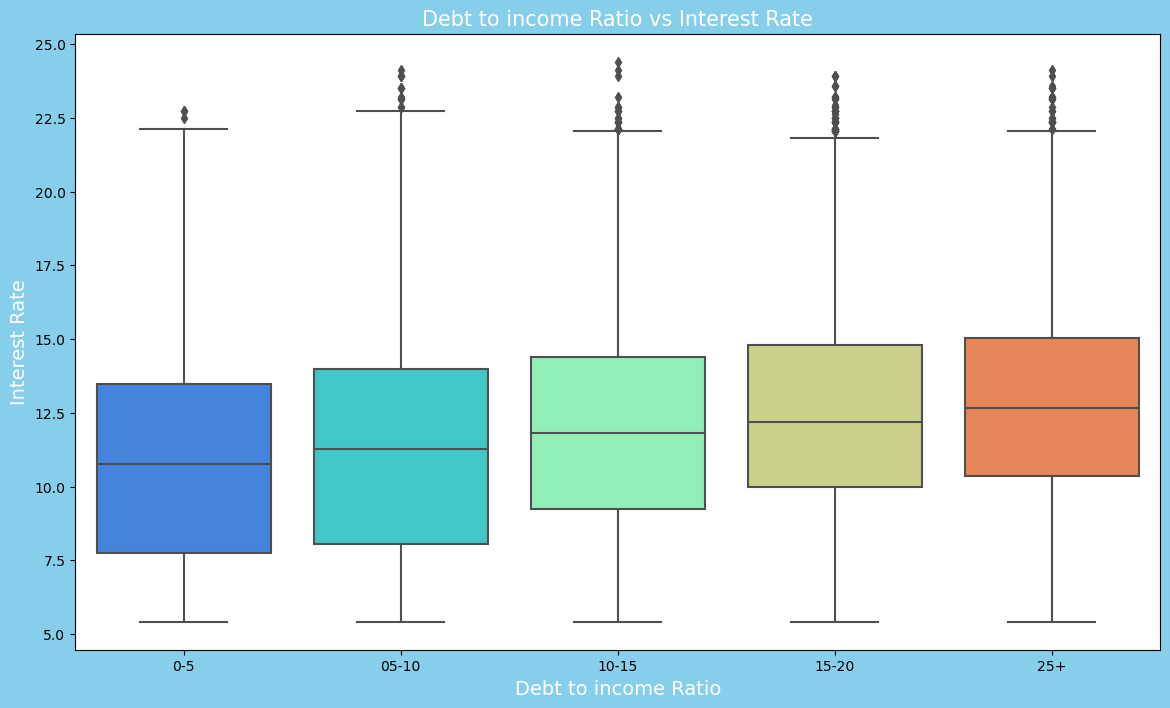

In [130]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='skyblue')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =L1,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

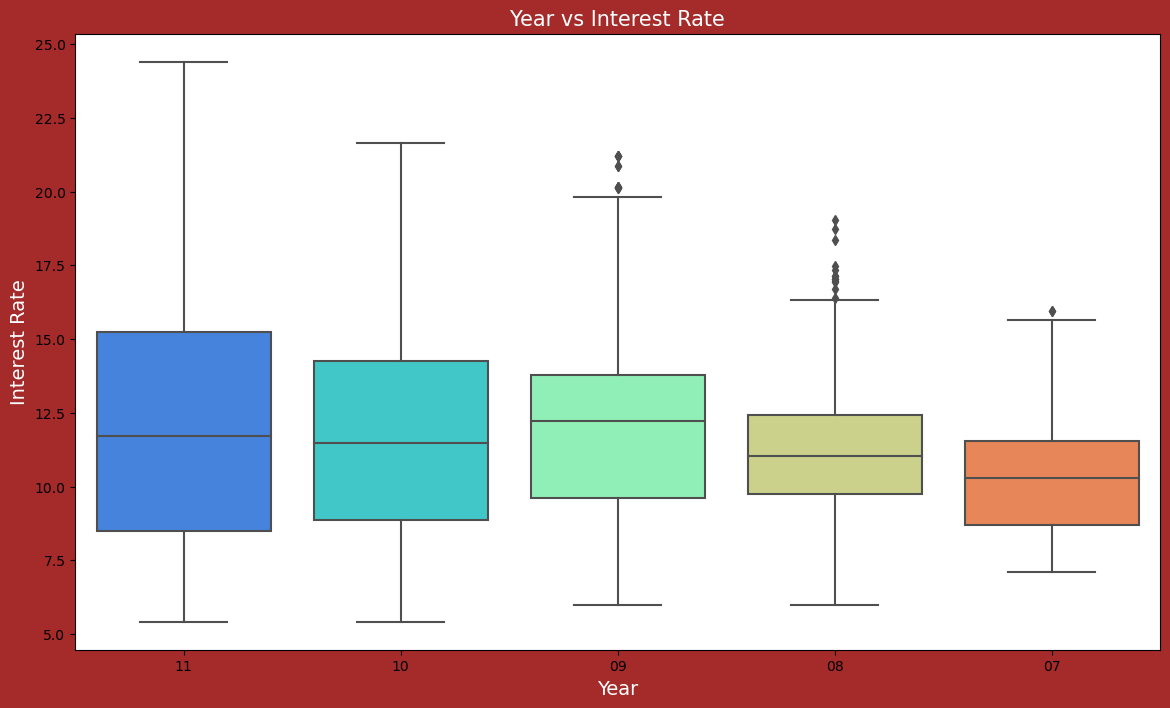

In [132]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='brown')
ax = sns.boxplot(y='int_rate', x='Year', data =L1,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

# Multivariate Analysis - Pair plots

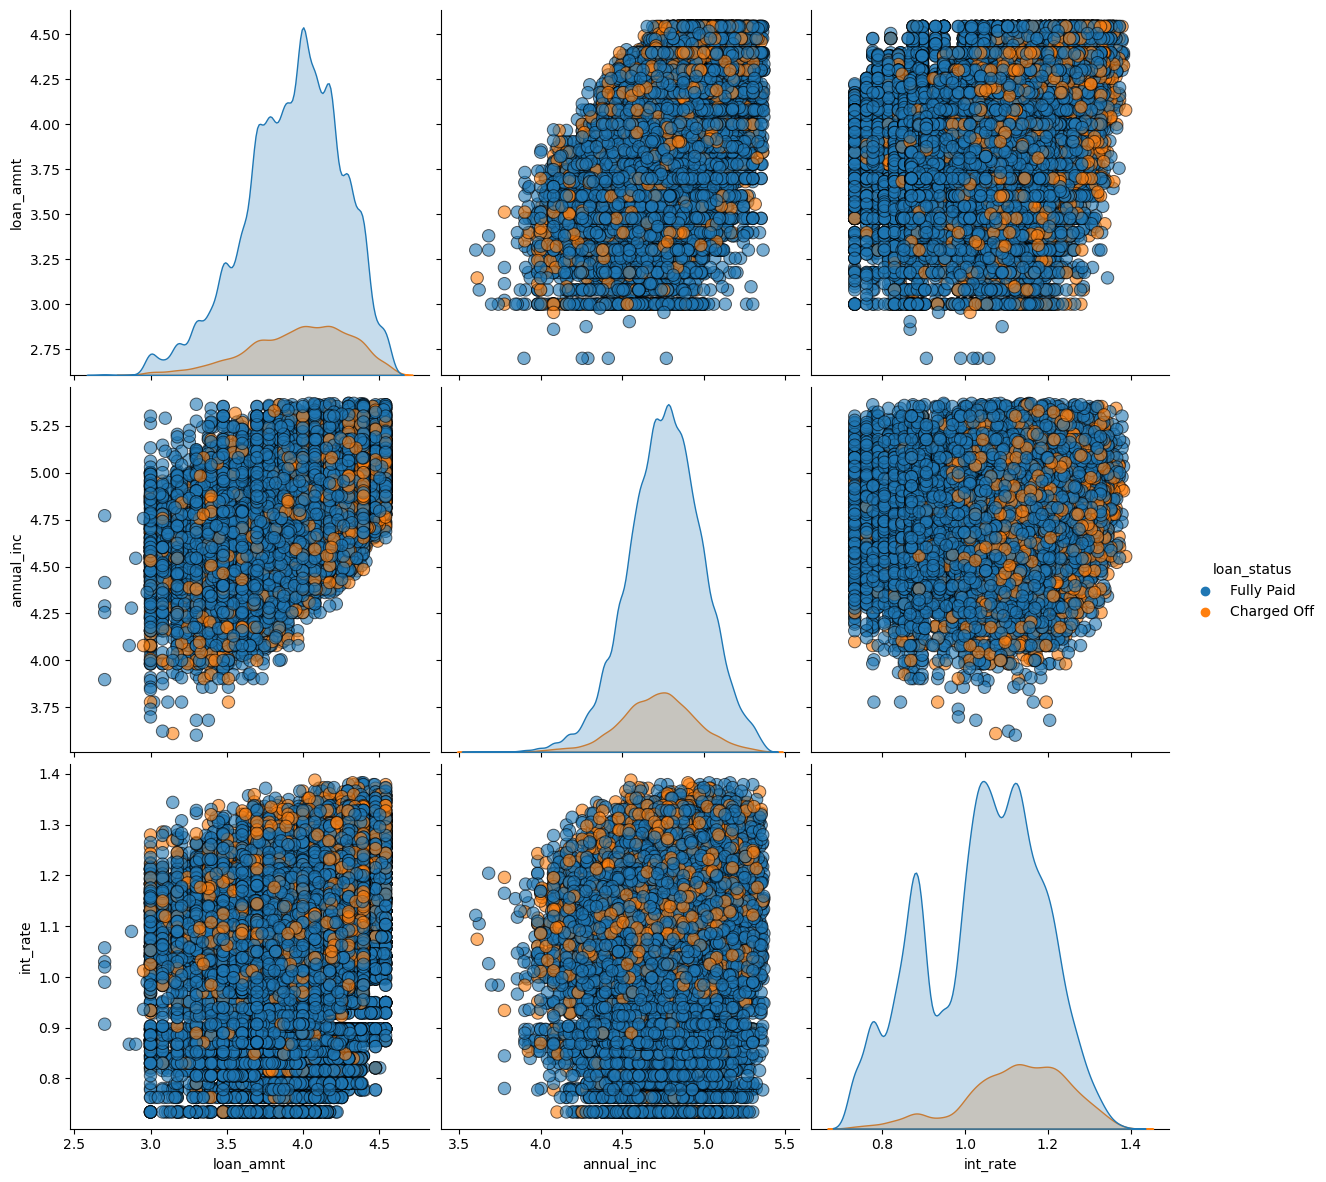

In [139]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = L1[['loan_amnt', 'annual_inc', 'Year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

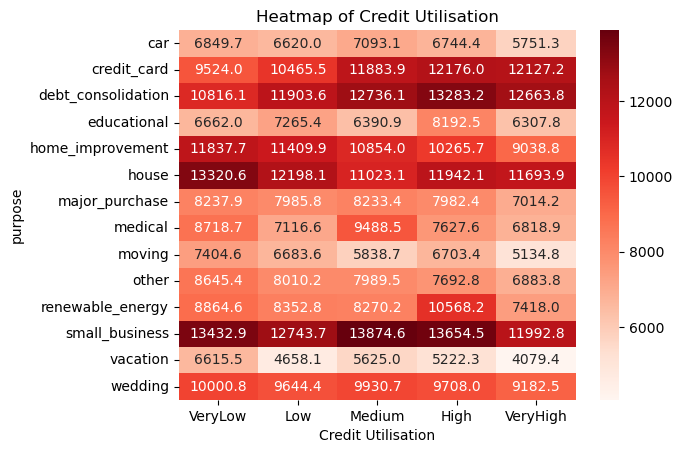

In [144]:
# making heatmap out of credit utilisation variable
L1["revol_util_binned_corr"] =pd.qcut(L1.revol_util , 5 , ["VeryLow","Low","Medium","High","VeryHigh"])
a = pd.pivot_table(data = L1 , columns = "revol_util_binned_corr", index = "purpose",values = "loan_amnt")
sns.heatmap(a, annot = True, cmap = "Reds",fmt = ".1f")
plt.title("Heatmap of Credit Utilisation")
plt.xlabel("Credit Utilisation")
plt.show()
